In [31]:
# https://github.com/kairess/image-stitching/blob/master/main.ipynb 참고
import cv2
import numpy as np
import matplotlib.pyplot as plt
import glob, os

In [76]:
img_list = []
IMG_NAME = 'boat'
for ext in ('0*.gif','0*.png','0*.jpg'):
    img_list.append(glob.glob(os.path.join('C:\\Users\\USER\\Downloads\\panorama_test\\',IMG_NAME,ext)))
img_list = sorted(img_list)
print(img_list)
cnt = 0
for i in img_list:
    if not i:
        cnt +=1
img_list = img_list[cnt]
print(img_list)

[[], [], ['C:\\Users\\USER\\Downloads\\panorama_test\\boat\\01.jpg', 'C:\\Users\\USER\\Downloads\\panorama_test\\boat\\02.jpg', 'C:\\Users\\USER\\Downloads\\panorama_test\\boat\\03.jpg', 'C:\\Users\\USER\\Downloads\\panorama_test\\boat\\04.jpg', 'C:\\Users\\USER\\Downloads\\panorama_test\\boat\\05.jpg', 'C:\\Users\\USER\\Downloads\\panorama_test\\boat\\06.jpg']]
['C:\\Users\\USER\\Downloads\\panorama_test\\boat\\01.jpg', 'C:\\Users\\USER\\Downloads\\panorama_test\\boat\\02.jpg', 'C:\\Users\\USER\\Downloads\\panorama_test\\boat\\03.jpg', 'C:\\Users\\USER\\Downloads\\panorama_test\\boat\\04.jpg', 'C:\\Users\\USER\\Downloads\\panorama_test\\boat\\05.jpg', 'C:\\Users\\USER\\Downloads\\panorama_test\\boat\\06.jpg']


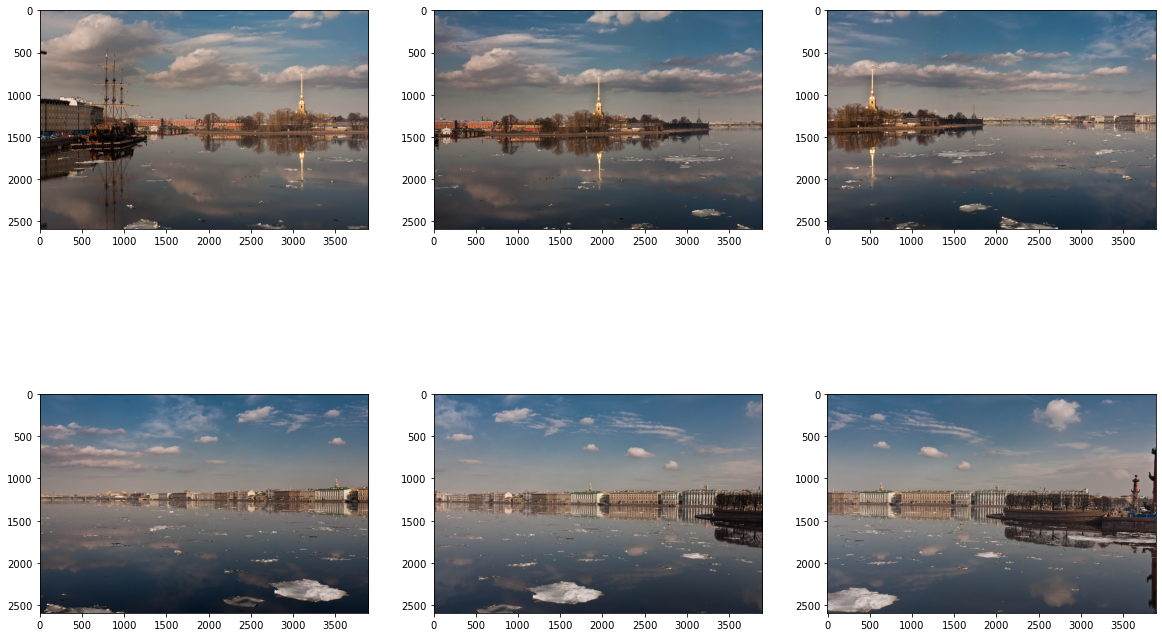

In [78]:
imgs = []
plt.figure(figsize = (20,20))
for i,img_path in enumerate(img_list):
    img = cv2.imread(img_path)
    imgs.append(img)
    plt.subplot(len(img_list)//3+1,3,i+1)
    plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))

In [79]:
mode = cv2.STITCHER_PANORAMA

if int(cv2.__version__[0]) == 3:
    stitcher = cv2.createStitcher(mode)
else:
    stitcher = cv2.Stitcher_create(mode)
status,stitched = stitcher.stitch(imgs)

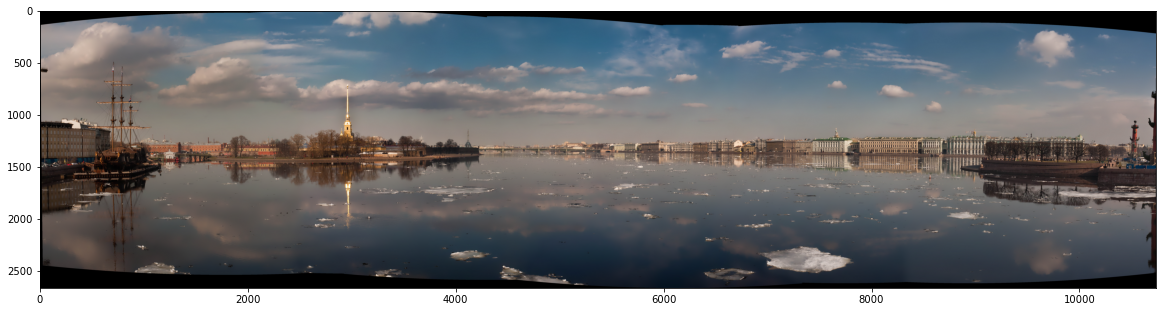

In [80]:
if status == 0:
    cv2.imwrite(os.path.join('C:\\Users\\USER\\Downloads\\panorama_test\\result\\',IMG_NAME+'_result.jpg'),stitched)
    plt.figure(figsize=(20,20))
    plt.imshow(cv2.cvtColor(stitched,cv2.COLOR_BGR2RGB))

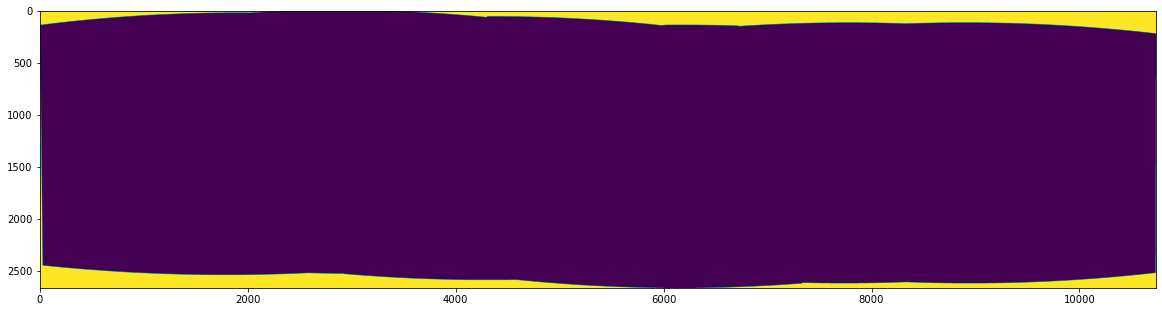

In [81]:
gray = cv2.cvtColor(stitched,cv2.COLOR_BGR2GRAY)
thresh = cv2.bitwise_not(cv2.threshold(gray,0,255,cv2.THRESH_BINARY)[1])
thresh = cv2.medianBlur(thresh,5)
plt.figure(figsize = (20,20))
plt.imshow(thresh)

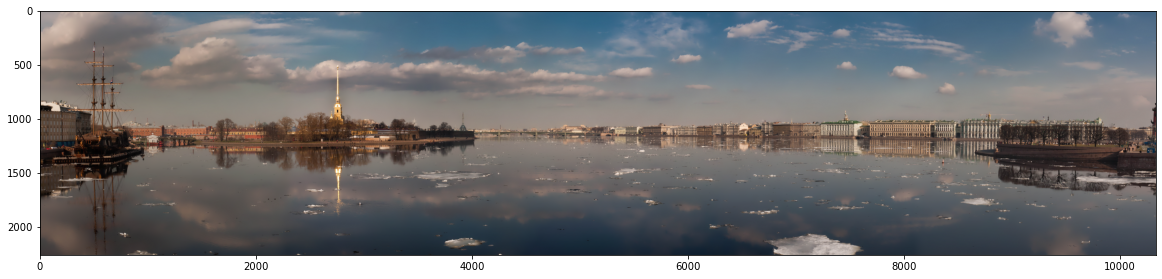

In [82]:
stitched_copy = stitched.copy()
thresh_copy = thresh.copy()

while np.sum(thresh_copy) > 0:
    thresh_copy = thresh_copy[1:-1,1:-1]
    stitched_copy = stitched_copy[1:-1,1:-1]
cv2.imwrite(os.path.join('C:\\Users\\USER\\Downloads\\panorama_test\\result\\',IMG_NAME+'_crop.jpg'),stitched_copy)
plt.figure(figsize=(20,20))
plt.imshow(cv2.cvtColor(stitched_copy,cv2.COLOR_BGR2RGB))

In [85]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import glob, os
    
def make_panorama(IMG_NAME):
    img_list = []
    for ext in ('0*.gif','0*.png','0*.jpg'):
        img_list.append(glob.glob(os.path.join('C:\\Users\\USER\\Downloads\\panorama_test\\',IMG_NAME,ext)))
    img_list = sorted(img_list)
    print(img_list)
    cnt = 0
    for i in img_list:
        if not i:
            cnt +=1
    img_list = img_list[cnt]
    mode = cv2.STITCHER_PANORAMA

    if int(cv2.__version__[0]) == 3:
        stitcher = cv2.createStitcher(mode)
    else:
        stitcher = cv2.Stitcher_create(mode)
    imgs = []
    for i,img_path in enumerate(img_list):
        img = cv2.imread(img_path)
        imgs.append(img)
        status,stitched = stitcher.stitch(imgs)
    if status == 0:
        cv2.imwrite(os.path.join('C:\\Users\\USER\\Downloads\\panorama_test\\result\\',IMG_NAME+'_result.jpg'),stitched)
    gray = cv2.cvtColor(stitched,cv2.COLOR_BGR2GRAY)
    thresh = cv2.bitwise_not(cv2.threshold(gray,0,255,cv2.THRESH_BINARY)[1])
    thresh = cv2.medianBlur(thresh,5)
    stitched_copy = stitched.copy()
    thresh_copy = thresh.copy()

    while np.sum(thresh_copy) > 0:
        thresh_copy = thresh_copy[1:-1,1:-1]
        stitched_copy = stitched_copy[1:-1,1:-1]
    cv2.imwrite(os.path.join('C:\\Users\\USER\\Downloads\\panorama_test\\result\\',IMG_NAME+'_crop.jpg'),stitched_copy)
    plt.figure(figsize=(20,20))
    plt.imshow(cv2.cvtColor(stitched_copy,cv2.COLOR_BGR2RGB))

[[], [], ['C:\\Users\\USER\\Downloads\\panorama_test\\myroom\\01.jpg', 'C:\\Users\\USER\\Downloads\\panorama_test\\myroom\\02.jpg', 'C:\\Users\\USER\\Downloads\\panorama_test\\myroom\\03.jpg', 'C:\\Users\\USER\\Downloads\\panorama_test\\myroom\\04.jpg', 'C:\\Users\\USER\\Downloads\\panorama_test\\myroom\\05.jpg']]


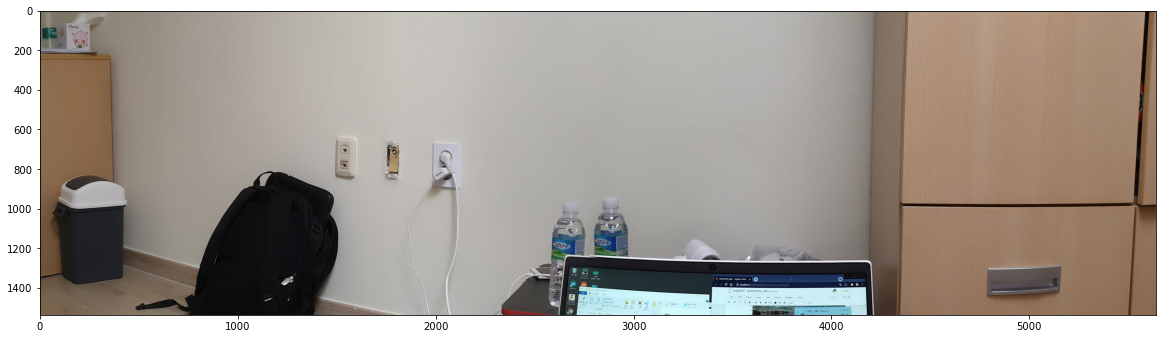

In [86]:
make_panorama("myroom")